### 1. (25 pontos) Realize 100-fold cross validation estratificado na base Skin Segmentation utilizando o classi cador 1-NN com distância Euclidiana então realize os procedimentos abaixo. 

In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from scipy import stats

In [10]:
# ------------------------------------ DADOS --------------------------------------

names_columns = ['B', 'G', 'R', 'Class']

df = pd.read_csv("Skin_NonSkin.csv", names=names_columns)
df.B.unique()

x = np.array(df[df.columns[0:3:]])
y = np.array(df[df.columns[-1::]]).flatten()

# 100-fold cross validation estratificado
skf = StratifiedKFold(n_splits = 100)
# classificador 1-NN com distância Euclidiana
classifier = KNeighborsClassifier(n_neighbors=1)

### (a) Mostre a média, o máximo e o mínimo da medida-F. 

In [37]:
def calc_f_measure(classifier):
    list_rates = []
    list_f_measure = []

    for train_index, test_index in skf.split(x,y):
        # TREINO
        x_train = x[train_index]
        y_train = y[train_index]
        # TESTE
        x_test = x[test_index]
        y_test = y[test_index]

        classifier.fit(x_train, y_train)
        rate = classifier.score(x_test, y_test)
        list_rates.append(rate)

        y_pred = classifier.predict(x_test)
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)

        f_measure = ((2*precision*recall)/(precision+recall))
        list_f_measure.append(f_measure)

    average_fMeasure = np.mean(list_f_measure)
    min_fMeasure = min(list_f_measure)
    max_fMeasure = max(list_f_measure)

    print("\n MÉDIA: \n")
    print("%.3f" % average_fMeasure)
    print("\n MÁXIMO: \n")
    print("%.3f" % max_fMeasure)
    print("\n MÍNIMO: \n")
    print("%.3f" % min_fMeasure)

    return list_f_measure, average_fMeasure

In [38]:
list_f_measure, average_fMeasure = calc_f_measure(classifier)



 MÉDIA: 

0.998

 MÁXIMO: 

1.000

 MÍNIMO: 

0.977


### (b) Mostre o histograma da medida-F.

In [27]:
def histogram_f_measure(list_f_measure):
    n_bins = len(list_f_measure)
    fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
    axs[0].hist(list_f_measure, bins=n_bins)

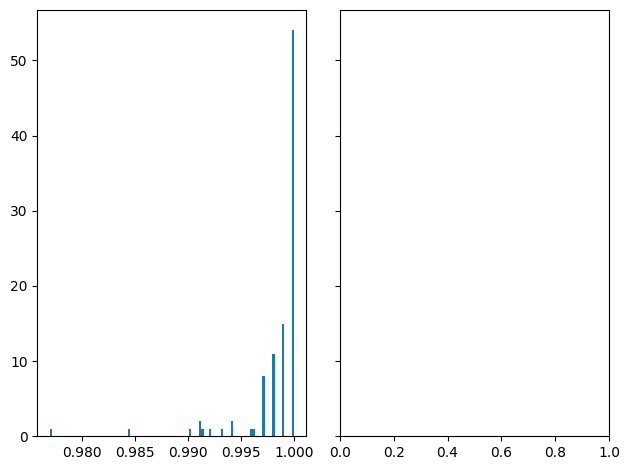

In [39]:
histogram_f_measure(list_f_measure)

### (c) Calcule o intervalo de confiança da medida-F.

In [57]:
def calc_confidence_interval(average_fMeasure, list_f_measure):
    desvio_padrao = np.std(list_f_measure)
    
    erro_padrao = desvio_padrao/np.sqrt(len(list_f_measure))

    multiplier = abs(stats.distributions.norm.ppf(0.025))

    confidence_interval = (average_fMeasure - multiplier*erro_padrao, average_fMeasure + multiplier*erro_padrao)
    print("\n INTERVALO DE CONFIANÇA \n")
    print(confidence_interval)

    return confidence_interval

In [58]:
confidence_interval = calc_confidence_interval(average_fMeasure, list_f_measure)


 INTERVALO DE CONFIANÇA 

(0.997643082377952, 0.9989729820531587)


### (d) Qual a medida-F mínima que você espera ao aplicar este classificador, sob as mesmas condições de treinamento, para dados nunca vistos?

O valor minimo do intervalo de confiança: 0.997643082377952

### (e) Qual a medida-F esperada para o classificador quando aplicada a dados nunca antes vistos. 


Valores dentro do intervalo de confiança: (0.997643082377952, 0.9989729820531587)

### 2. (25 pontos) Realize um experimento pareado com 100 repetições de Holdout 50/50 utilizando o classi cador 1-NN com distância Euclidiana. Utilize duas versões da base Wine archive. ics.uci.edu/ml/datasets/Wine para este experimento, a primeira versão é a base original, a segunda versão é a base sem a última coluna. Após calcular 100 taxas de acero para cada uma das versões da base, realize os procedimentos abaixo. 


In [61]:
names_columns = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

df = pd.read_csv("wine.data", names=names_columns)

# v1
y = np.array(df[df.columns[:1:]]).flatten()
# v2
y2 = df[df.columns[:1:]]


In [ ]:
def calcular_taxas_removendo_colunas(dataframe, qtd_colunas_retiradas, qtd_taxas, porcent_test):
    arrays = []
    colunas = len(dataframe.columns)-1
    classificador = KNeighborsClassifier(n_neighbors=1)
    for n in range(qtd_colunas_retiradas):
        array_taxas = []
        x = (dataframe[dataframe.columns[1:colunas:]])
        colunas -= 1
        for i in range(qtd_taxas):
            x_treino, x_teste, y_treino, y_teste = train_test_split (x, y,test_size=porcent_test, random_state=i)
            classificador.fit(x_treino, y_treino)
            taxas = classificador.score(x_teste, y_teste)
            array_taxas.append(taxas)

        arrays.append(array_taxas)

    return arrays

arrays_taxas = calcular_taxas_removendo_colunas(df, 2, 100, 0.5)